In [1]:
###Introduction to Convolutional Nueral Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pathlib


In [2]:
## Lets get the data set from kaggle https://www.kaggle.com/datasets/dansbecker/food-101

import zipfile
#wget gets the file and downloads its to the colab drive
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the file now, this unzips and extract all extracts it on to the google drive
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()



--2024-05-28 23:19:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 142.251.162.207, 74.125.134.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   108MB/s    in 1.0s    

2024-05-28 23:19:16 (108 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [8]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [9]:
import os
for dirpath ,dirnames , filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and images {len(filenames)} in {dirpath}")

There are 2 directories and images 0 in pizza_steak
There are 2 directories and images 0 in pizza_steak/test
There are 0 directories and images 250 in pizza_steak/test/steak
There are 0 directories and images 250 in pizza_steak/test/pizza
There are 2 directories and images 0 in pizza_steak/train
There are 0 directories and images 750 in pizza_steak/train/steak
There are 0 directories and images 750 in pizza_steak/train/pizza


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 26 11:21 .
drwxr-xr-x 1 root root 4096 May 26 11:21 ..
drwxr-xr-x 4 root root 4096 May 26 11:21 test
drwxr-xr-x 4 root root 4096 May 26 11:21 train


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [22]:
datadir= pathlib.Path("pizza_steak/train")

class_names = np.array(sorted([item.name for item in datadir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
### Visualise the images

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  image = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape :{image.shape}")
  return image

['2831983.jpg']
Image shape :(512, 512, 3)


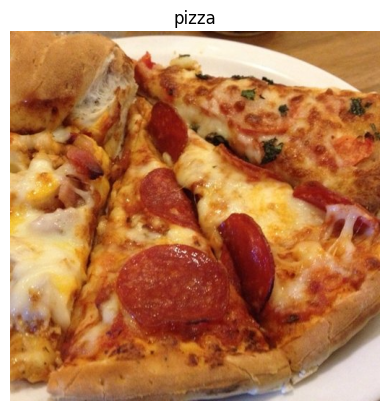

In [10]:
img = view_random_image(target_dir ="pizza_steak/train/",
                  target_class = "pizza")



In [11]:
tf.constant(img)
img.shape

(512, 512, 3)

In [12]:
img = img/255.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

## Set up paths to our directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#import data from directories and turn data into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
###Lets build a convolutional nn to find patterns in our images
# we need to load , preprocess , build a cnn
## We need to compile and fit
import tensorflow as tf


###Build a CNN model

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                    kernel_size =3,
                    activation="relu",
                    input_shape=(224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
     tf.keras.layers.MaxPool2D(pool_size= 2,
                               padding = "valid"),
     tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])


model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.SGD(),
               metrics =["accuracy"])


history1= model1.fit(train_data,
                     epochs =5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                     validation_steps = len(valid_data) )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 145ms/step - loss: 0.6891 - accuracy: 0.5013 - val_loss: 0.6834 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6776 - accuracy: 0.5313 - val_loss: 0.6600 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6240 - accuracy: 0.6627 - val_loss: 0.5243 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5391 - accuracy: 0.7347 - val_loss: 0.4810 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5043 - accuracy: 0.7640 - val_loss: 0.4478 - val_accuracy: 0.7960


In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

##Study https://poloclub.github.io/cnn-explainer/

In [15]:
### checking if previous non CNN model works with our image data

import tensorflow as tf

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =["accuracy"])

history2 = model2.fit(train_data,
                      epochs =5,
                      steps_per_epoch =len(train_data),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 7s 108ms/step - loss: 0.7173 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),## added another dense layers and increased no of nuerons to improve the accuracy
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics =["accuracy"])

history3 = model3.fit(train_data,
                      epochs =5,
                      steps_per_epoch =len(train_data),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 8s 144ms/step - loss: 3.1123 - accuracy: 0.6367 - val_loss: 0.5684 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.7447 - accuracy: 0.7347 - val_loss: 0.4931 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6452 - accuracy: 0.7513 - val_loss: 2.0307 - val_accuracy: 0.5160
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.8362 - accuracy: 0.7207 - val_loss: 0.8691 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.5190 - accuracy: 0.7687 - val_loss: 0.6504 - val_accuracy: 0.7180


In [18]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


['3767723.jpg']
Image shape :(384, 512, 3)
['1219039.jpg']
Image shape :(384, 512, 3)


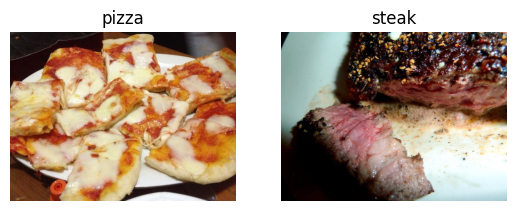

In [19]:
## Visualizing the data , trying to understand how various images look

plt.figure()
plt.subplot(1,2,1)
img1 = view_random_image(target_dir ="pizza_steak/train/", target_class = "pizza")
plt.subplot(1,2,2)
img2 = view_random_image(target_dir ="pizza_steak/train/", target_class = "steak")


In [20]:
##COmmand for findging the kind of GPU used
!nvidia-smi

Sun May 26 11:23:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0              28W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
##Precprocessing the data , preparing it for a model

#Define the directory dataset paths
train_dir= "pizza_steak/train"
test_dir ="pizza_steak/test"

In [9]:
##Turn of data into batches . Get the data into small batches mostly 32 so that its easier for the processor
##Create train and test data generators and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)


In [10]:
train_data = train_datagen.flow_from_directory(directory=train_dir,  #target directory
                                               target_size=(224,224), #image height width
                                               class_mode ="binary", # type of data you are working with
                                               batch_size =32) # size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size =(224,224),
                                             class_mode ="binary",
                                             batch_size =32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [12]:
len(train_data) ## 1500/32 total data divided by batch size


47

Text(0.5, 1.0, '0.0')

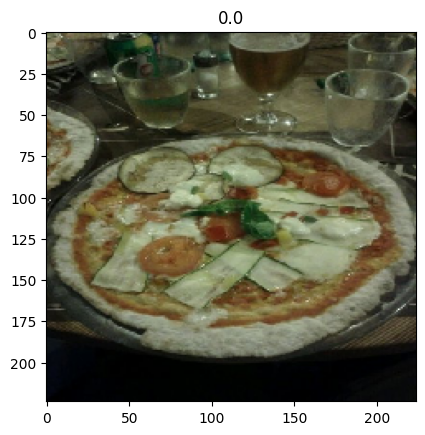

In [39]:
images[0].shape,images[10]
plt.imshow(images[0])
plt.title(labels[0])

32

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras import Sequential

In [20]:
#Create the new model basline for 3layer CNN these are without the maxpooling layer


model4 = Sequential([
    Conv2D(filters =10,
           kernel_size = 3,
           activation="relu",
           input_shape =(224,224,3)),## Input layer
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")## output layer is binary hence using sigmoid function
])


model4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer ="Adam",
               metrics =["accuracy"])

history4 = model4.fit(train_data,
           epochs =5,
           steps_per_epoch=len(train_data),
           validation_data=test_data,
           validation_steps =len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 2.0012 - accuracy: 0.6173 - val_loss: 0.5127 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4369 - accuracy: 0.8200 - val_loss: 0.3997 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2622 - accuracy: 0.9047 - val_loss: 0.3491 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.1105 - accuracy: 0.9707 - val_loss: 0.4064 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.0398 - accuracy: 0.9927 - val_loss: 0.3892 - val_accuracy: 0.8460


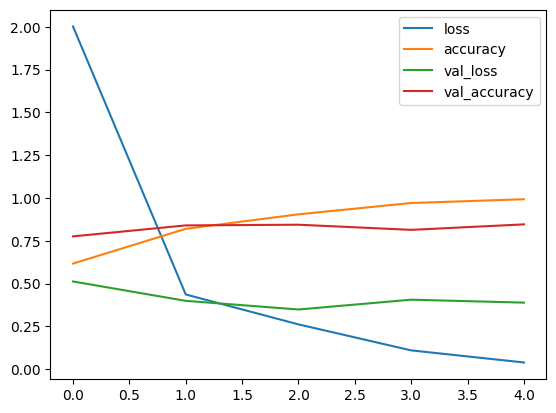

In [22]:
df = pd.DataFrame(history4.history).plot()


In [36]:
def plot_loss_curves(history):
### Create the seperate loss curves for training and test sets

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))### produces the range (0,5)
  print(epochs)
  plt.plot(epochs,loss,label="training loss")
  plt.plot(epochs,val_loss, label="val loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="training accuracy")
  plt.plot(epochs,val_accuracy, label="val accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


range(0, 5)


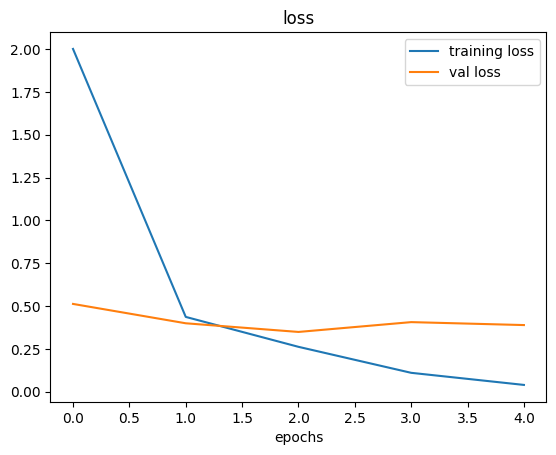

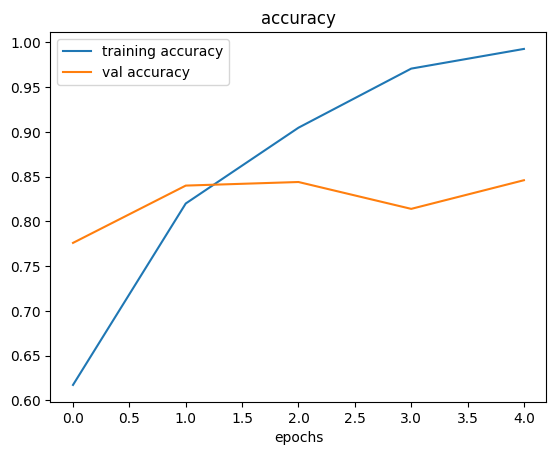

In [31]:
plot_loss_curves(history4)

## Adjust the model parameters to avoid overfitting,validation losses go up means that the
### model is overfitting

Ways to induce overfitting
1. increase the conv layers
2,increase the filters in the conv layer
3.Add another dense layer to the output of flattened layer


To reduce overfitting
1. Add data sugmentation
2.Add regularization layers (maxpool2d)
3.Add more data


In [31]:
model5  = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

NameError: name 'Sequential' is not defined

In [36]:
model5.compile(loss="binary_crossentropy",
               optimizer = Adam(),
               metrics =["accuracy"])


histroy5 = model5.fit(train_data,
                      epochs=5,
                      steps_per_epoch =len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 154ms/step - loss: 0.6583 - accuracy: 0.5800 - val_loss: 0.5669 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4936 - accuracy: 0.7593 - val_loss: 0.4803 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.4159 - accuracy: 0.8120 - val_loss: 0.3429 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3765 - accuracy: 0.8347 - val_loss: 0.3460 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3512 - accuracy: 0.8467 - val_loss: 0.3229 - val_accuracy: 0.8620


In [37]:
model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

range(0, 5)


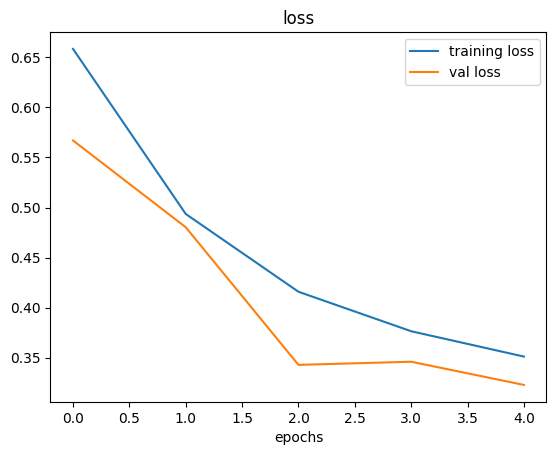

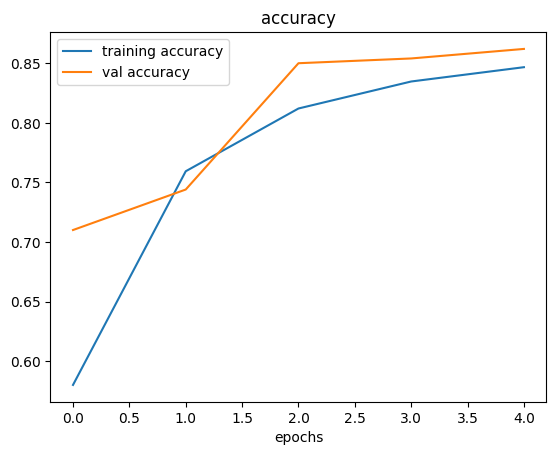

In [38]:
plot_loss_curves(histroy5)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(rescale =1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)
#Define the directory dataset paths
train_dir= "pizza_steak/train"
test_dir ="pizza_steak/test"

train_datagen_augmented = ImageDataGenerator(rescale=(1/255.),
                                             rotation_range =0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range =0.3,
                                             horizontal_flip=True)

In [5]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    class_mode="binary",
                                                                    shuffle=False)


train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                class_mode="binary",
                                                shuffle=False)



test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                class_mode="binary",
                                                shuffle=False)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
## Data augmentation is usually performed on training data , the augmented images are not changed in the directory but are changed as we load them

In [22]:
images , labels =train_data.next()

aug_images , aug_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

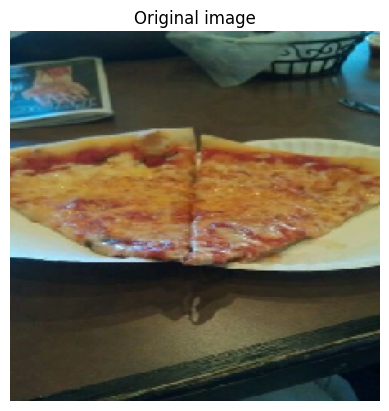

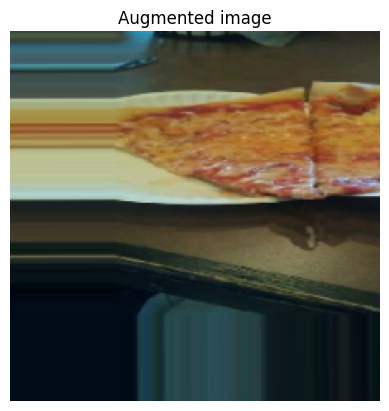

In [29]:
import random

random_num = random.randint(0,31)
plt.imshow(images[random_num])
plt.title("Original image")
plt.axis(False)

plt.figure()
plt.imshow(aug_images[random_num])
plt.title("Augmented image")
plt.axis(False)

In [37]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras import Sequential


model6= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])


model6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])


history6 =model6.fit(train_data_augmented,
           epochs= 5,
           steps_per_epoch=len(train_data_augmented),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 526ms/step - loss: 0.8572 - accuracy: 0.5080 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.7014 - accuracy: 0.4987 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6928 - accuracy: 0.4960 - val_loss: 0.6860 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 20s 426ms/step - loss: 0.6890 - accuracy: 0.5933 - val_loss: 0.6682 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6964 - accuracy: 0.6173 - val_loss: 0.7082 - val_accuracy: 0.5000


range(0, 5)


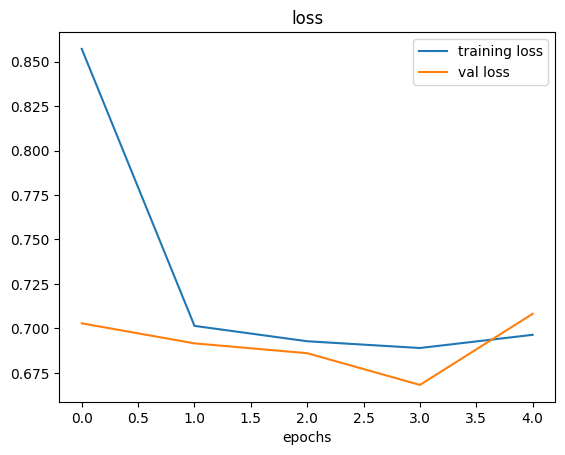

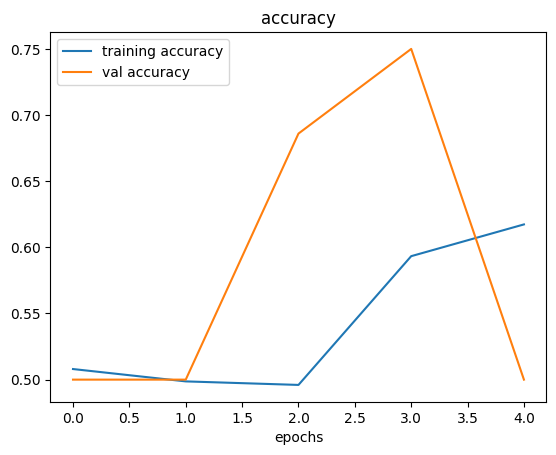

In [38]:
plot_loss_curves(history6)

In [11]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    class_mode="binary",
                                                                    shuffle=True)

##Shuffles the data between pizza and steak making it to learn better
## augmentation has added dynamic rotatiom  , shear , zoom to randomise the images


Found 1500 images belonging to 2 classes.


In [12]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation
from tensorflow.keras import Sequential

model7= Sequential([
    Conv2D(10,3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])


model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])


history7 =model7.fit(train_data_augmented_shuffled,
           epochs= 5,
           steps_per_epoch=len(train_data_augmented_shuffled),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.6621 - accuracy: 0.5980 - val_loss: 0.5268 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 81s 2s/step - loss: 0.5721 - accuracy: 0.7087 - val_loss: 0.5535 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 116s 2s/step - loss: 0.5410 - accuracy: 0.7373 - val_loss: 0.4536 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 96s 2s/step - loss: 0.4907 - accuracy: 0.7673 - val_loss: 0.3348 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 72s 2s/step - loss: 0.4672 - accuracy: 0.7980 - val_loss: 0.3121 - val_accuracy: 0.8660


range(0, 5)


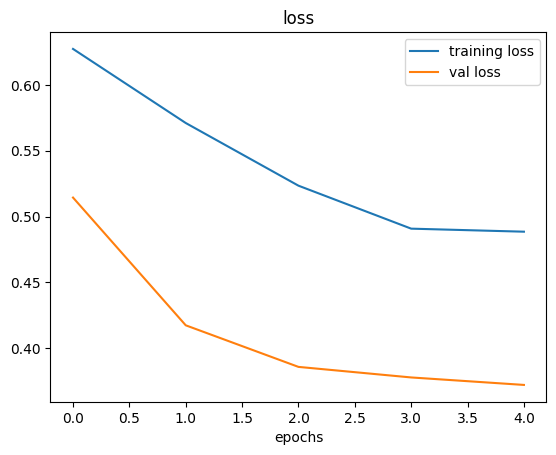

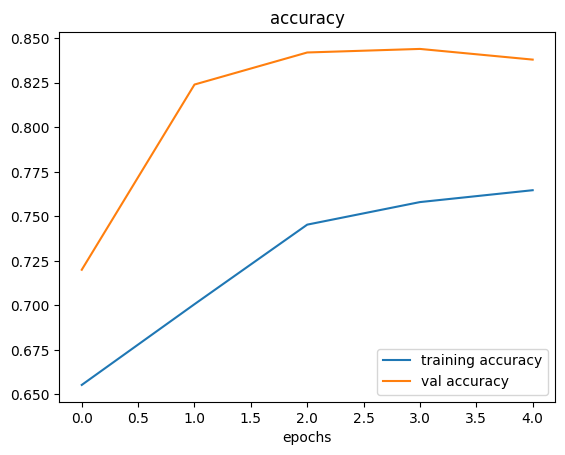

In [43]:
plot_loss_curves(history7)

In [9]:
model7= Sequential([
    Conv2D(32,3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])


model7.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])


history7 =model7.fit(train_data_augmented_shuffled,
           epochs= 5,
           steps_per_epoch=len(train_data_augmented_shuffled),
           validation_data = test_data,
           validation_steps = len(test_data))

NameError: name 'Sequential' is not defined

In [1]:

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-05-28 23:08:01--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 252.05K  --.-KB/s    in 0.02s   

2024-05-28 23:08:02 (10.6 MB/s) - ‘03-steak.jpeg’ saved [258096]



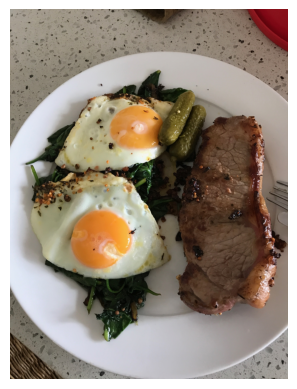

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("03-steak.jpeg")

plt.imshow(steak)
plt.axis(False);

In [7]:
steak.shape

(4032, 3024, 3)

In [16]:
def load_and_prep_image(filename, img_shape=(224)):
  #Read the iamge
  img = tf.io.read_file(filename)
  #decode and read file to tensor
  img = tf.image.decode_image(img)
  #resizing image
  img= tf.image.resize(img,size=[img_shape,img_shape])
  #rescale
  img= img/255.
  return img

In [19]:
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [23]:
pred = model7.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 160ms/step


In [25]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [30]:
def predictandplot(filename, model , classnames= class_names):
  img= load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = classnames[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


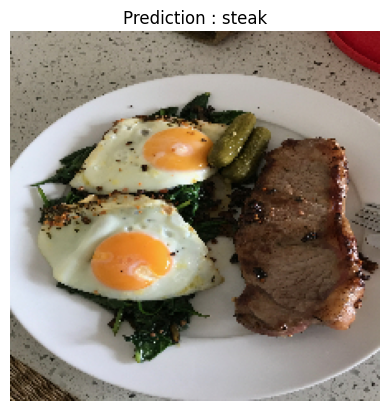

In [31]:
predictandplot(filename="03-steak.jpeg",model=model7)

1/1 [==============================] - 0s 47ms/step


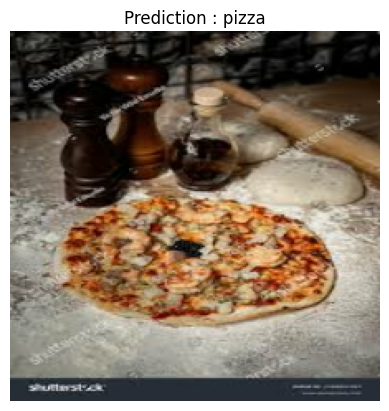

In [32]:
predictandplot(filename="images.jpg",model=model7)

1/1 [==============================] - 0s 63ms/step


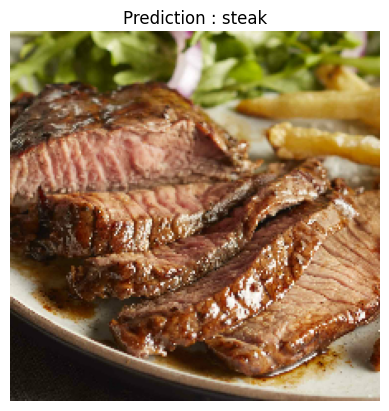

In [33]:
predictandplot(filename="steaknew.jpg",model=model7)

## Multiclass image classificaition
